# **1. Business Understanding**

######This assignment is to help in analyzing data and make business solutions and decisions to the healthcare business clients. The clients are desired to have a software assisting tool to help doctors in identifying the existence of heart disease in patients. For instance, the assisting tool can be used as a guidance to help recognize the possibility of heart diseases or other illnesses occurring in them without any screening or invasive test. Thus, the doctors can use the tool to trace the possible factor in a short time with minimum effort by analysing patients’ blood pressure, electrocardiogram, etc (Railton, 2020).

# **2. Data understanding**

######**Collect Initial Data**
A set of data which describes the patients’ information is acquired from Kaggle, the biggest data science community with well-equipped tools and resources in the world to aid achieving data science goals. The database consists of 76 attributes, however all published experiments use only fourteen attributes among them. Particularly, machine learning researchers use only Cleveland databases to this date. 
<br /><br />
######**Describe Data**
There are thirteen attributes information being used in this project.
<br /><br />
######**Age** (age)
The age of patients refers to their length of time living in this world. For instance, a man is born in 2000, thus his age is 20 year-old in 2020.
<br /><br />
######**Sex** (sex)
Sex refers to a set of biological attributes in humans and animals (Canadian Institutes of Health Research, 2020). In the context of humans, sex is normally divided as male and female.
<br /><br />
######**Chest Pain Type** (cp)
There are four chest pain types which are 0 (typical angina), 1 (atypical angina), 2 (non-anginal pain) or 3 (asymptomatic). 
<br /><br />
######**Serum Cholesterol in mg/dL** (chol)
The degree of serum cholesterol is used to measure some blood elements such as the number of high-density lipoprotein cholesterol (HDL) and low-density lipoprotein cholesterol (LDL) in one’s blood (Huizen, 2018). The healthy serum cholesterol level in mg/dl is less than 200 mg/dL.
<br /><br />
######**Fasting Blood Sugar > 120 mg/dL** (fbs)
Human’s blood sugar will normally peak about an hour after having a meal and drops after an hour (Vilines, 2019). Fasting blood sugar levels shows essential ideas on how one’s body manages blood sugar. A fasting blood sugar level of less than 100 mg/dL is considered as normal. 0 indicates false while 1 represents true.
<br /><br />
######**Resting Electrocardiographic Results (Values 0, 1, 2)** (restecg)
The resting electrocardiogram (ECG) is a test that measures the electrical activity of a resting heart (Choosing Wisely Canada, n.d.). It shows information such as heart rate and rhythm, hypertension or myocardial infarction. Its test result is indicated by 0 (normal), 1 (having ST-T wave abnormality) or 2 (probable or definite left ventricular hypertrophy by Estes’ criteria).
<br /><br />
######**Maximum Heart Rate Achieved** (thalach)
Maximum heart rate (MHR) is the fastest rate of one’s heart beats in a minute (Waehner, 2020). It is important to know one’s MHR because it could be influenced by other factors such as medication. For instance, a person with high blood pressure will treat medication as a daily routine and it could affect one’s heart rate such as accelerating it (highervis, 2018).
<br /><br />
######**Exercise Induced Angina** (exang)
Angina is a type of chest pain induced because of reduced blood flow to one’s heart muscle, causing less oxygen being carried to the heart muscle (Mayo Clinic, 2020). It is indicated by 0 (yes) or 1 (no).
<br /><br />
######**Oldpeak** (oldpeak)
This refers to  the Sinus Tachycardia (ST) depression induced by exercise relative to rest.
<br /><br />
######**The Slope of The Peak Exercise ST Segment** (slope)
Value 1 represents upsloping, value 2 represents flat while value 3 represents downsloping.
<br /><br />
######**Number of Major Vessels Coloured by Fluoroscopy**
The number could be ranged from 0 to 3.
<br /><br />
######**Thalassemia** (thal)
Thalassemia is an inherited blood disorder caused when one’s body produces insufficient amounts of haemoglobin (Centers for Disease Control and Prevention, 2020). Value 3 indicates normal, 6 is fixed defect, while 7 is reversible defect.

## **Access Data**

In [2]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [3]:
# File path to the dataset 
file_path = 'drive/Shared drives/Data Science/datasets_heart.csv'
model_path = 'drive/Shared drives/Data Science/Best Model/{}_model.sav'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# read file
data = pd.read_csv(file_path)
data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


###Exploratory Data Analysis(EDA)


Text(0.5, 1.0, 'Heart Disease')

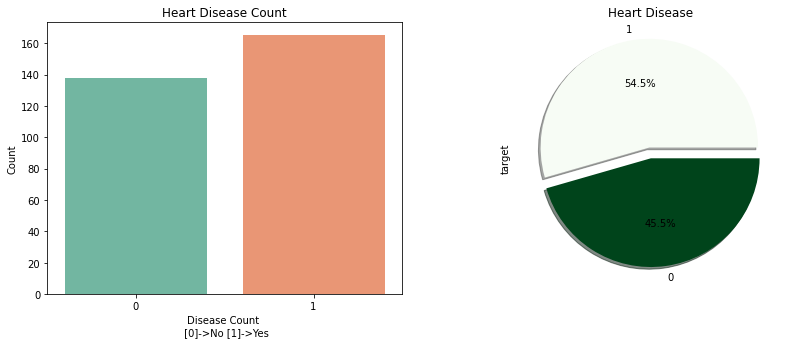

In [ ]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease")

## **Verify Data Quality**
According to the original data collector, the dataset was being collected from 4 different hospital and they try to reach out all the cases in order to cover most of the possible cases. Hence, the completeness of the data can be assured although the size of the dataset is smaller compared to other project.
<br />
Moreover, the dataset was collectedthrough stratify sampling, hence, this small sample can help to reflect the actual proportion of the cases of the real world cases to the supervised learning model which may give it as a better stimultation to our model to the real world circumstance during deployment.
<br />
Moreover, the quality of the data can be further assured as there has no missing value or major errors in the dataset. by far, only one errors was found in the column of "CA" which was realised by the original collector and the recovering procedure will be implement in **Stage 3 (Clean Data subsession)**

In [ ]:
print(data.describe())
print(data.info())
print(data.isnull().sum())
data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#**3. Data Preparation**

##**Select Data**
First, in order to select the effective features from the dataset, we need to find out and include the relevance data only. In our dataset, there are a total of thirteen features, among them, 5 of them are continuous data and 8 of them are nominal and ordinal data. To model the relationship between the continuous data features, correlation between each feature and the labels class of the data will be calculated using a bivariate correlation approach, namely the Pearson correlation. As we can see in the last column most of the features seem to have a certain degree of correlation with the labels of the dataset which implies that they are related to the class of the data and relevant to this dataset. 


target      1.000000
oldpeak     0.430696
thalach     0.421741
age         0.225439
trestbps    0.144931
chol        0.085239
Name: target, dtype: float64


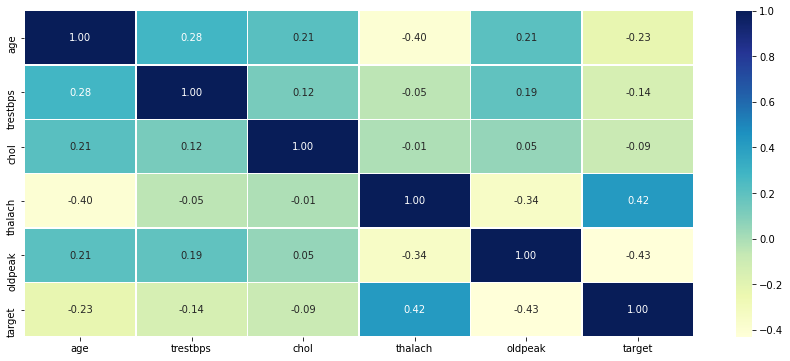

In [ ]:
data_corr = data[["age", "trestbps", "chol", "thalach", "oldpeak", "target"]]
corr = data_corr.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,
            annot = True,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidth = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")

print(corr["target"].abs().sort_values(ascending=False))

In order to test the relevance of the nominal data features, barchart is being plotted to view the ratio between the different categories of the feature and the number of the patients that have or do not have heart diseases. If there are bigger difference in ratio among each categories of the features that the feature can be considered to have a more significant relationship and association with the class of the data, whereas if the ratio between each categories of the barchart is less different, then the feature may not be that correlated with the class of the data.

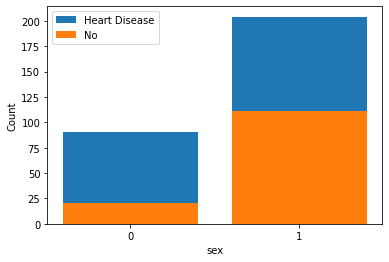

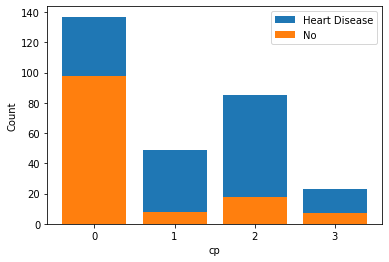

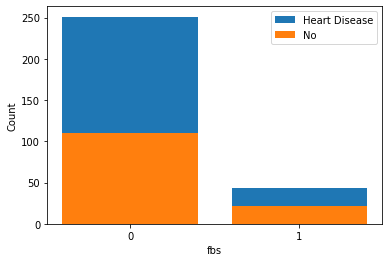

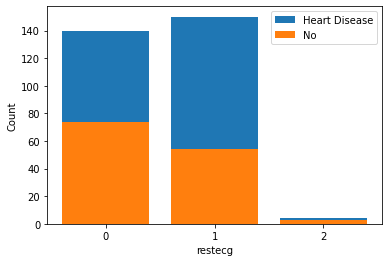

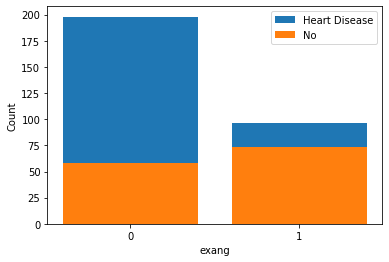

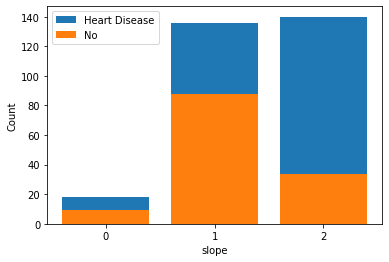

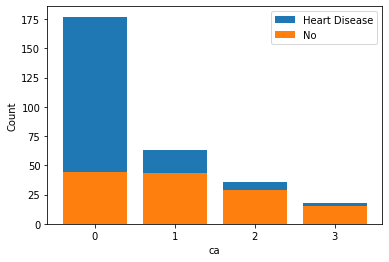

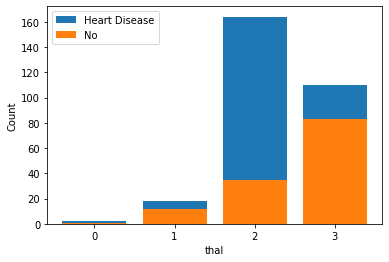

In [ ]:
features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
data_list = []
for feature in features:
  sub_list = []
  for uniq in sorted(data[feature].unique()):
    sub_list.append([data[feature][data[feature] == uniq].count(), data[feature][(data[feature] == uniq) & (data["target"] == 0)].count()])
    #sub_list.append(data[feature][data[feature] == uniq].count())
  data_list.append(np.array(sub_list).T)

for feat, dl in zip(features, data_list):
  x_pos = [x for x in range(len(dl[0]))]
  y_pos = np.arange(len(dl[0]))
  plt.bar(y_pos, dl[0], label="Heart Disease", align='center')
  plt.bar(y_pos, dl[1], label="No", align='center')
  plt.xticks(y_pos, x_pos)
  plt.xlabel(feat)
  plt.ylabel("Count")
  plt.legend()
  plt.show()

##**Clean Data**
First, the empty or the missing values in the dataset will be checked. In this dataset, there are no empty or missing values. Hence, there is no need to derive, generate or remove any records due to missing or invalid values. Then, the out of bound values will be eliminated. First, we will check the nominal data. As from the original data collector, each of the nominal and ordinal features has a fixed domain values, which 7 of them does not contain any out-of-bound values except the feature - ca (number of major vessels colored by fluoroscopy), where it suppose to have 4 class but in dataset, it contains a total of 5 class: [0, 1, 2, 3, 4]. According to the dataset collector, this is due to the mistake of the worker from one of the hospital branches accidentally labeling the class wrongly which should be class ‘0’ but not class ‘4’.


In [5]:
print(data.sex.unique())
print(data.cp.unique())
print(data.fbs.unique())
print(data.restecg.unique())
print(data.exang.unique())
print(data.slope.unique())
print(data.ca.unique())
print(data.thal.unique())
print(data.target.unique())

# Changing the error ca '4' back to '0'
data.ca.replace(to_replace=4, value=0, inplace=True)

print(data.target.value_counts())

[1 0]
[3 2 1 0]
[1 0]
[0 1 2]
[0 1]
[0 2 1]
[0 2 1 3 4]
[1 2 3 0]
[1 0]
1    165
0    138
Name: target, dtype: int64


Next, for the 5 continuous features, finding the noise and the outliers of the data will be the main approach to clean the data. The method for finding the outliers is using the z-score. The Z-score is a way of describing a data point in terms of its relationship to the mean and standard deviation of a group of points by simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1. The goal is to remove the effects of the location and scale of the data, allowing different datasets to be compared directly and once if the anything is too far from zero (exceed the threshold of -3.5 and 3.5) then it would be considered as outlier. Due to our dataset being small in size, a modified z-score (using median) will be constructed as follows to find out the outliers.

By using the modified z-score, we have filtered out a total of 9 rows which are considered as outliers.

In [ ]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [ ]:
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
array = np.ndarray((0,), dtype=int)
for feature in features:
  pos_mzs = outliers_modified_z_score(data[feature])
  array = np.concatenate((array, pos_mzs[0]))

outliers = np.unique(array)
print(len(outliers))

# fbs, ca, thal got many outliers

9


In [ ]:
print(len(data))
data = data.drop(outliers)
print(len(data))
print(data)

303
294
     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0

##**Construct Required Data**

Min Max scaler is used to model all the 5 continuous data features to rescale and transform the continuous data into a range of values between 0 to 1. This scaling approach is performed because some of the models we used are non-tree models which will have a certain degree of dependence on scaled data, such as SVM which is sensitive to distance and length of the data distribution.

### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X_heart = data.drop('target', axis=1)
y_heart = data['target']

X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, random_state=23, stratify=y_heart)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape, y_train[y_train == 1].shape, y_train[y_train == 0].shape)
print(y_test.shape, y_test[y_test == 1].shape, y_test[y_test == 0].shape)


(220, 13)
(74, 13)
(220,) (122,) (98,)
(74,) (41,) (33,)


In [ ]:
# scale continuous columns with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[["age", "trestbps", "chol", "thalach", "oldpeak"]] = scaler.fit_transform(X_train[["age", "trestbps", "chol", "thalach", "oldpeak"]])
X_test[["age", "trestbps", "chol", "thalach", "oldpeak"]] = scaler.transform(X_test[["age", "trestbps", "chol", "thalach", "oldpeak"]])

X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
128,0.489362,0,2,0.488372,0.261194,0,0,0.710526,0,0.022727,1,0,2
67,0.340426,0,1,0.418605,0.402985,0,0,0.763158,0,0.136364,1,0,2
217,0.723404,1,0,0.418605,0.761194,1,0,0.385965,1,0.409091,2,3,3
66,0.468085,1,2,0.069767,0.358209,0,1,0.482456,1,0.272727,1,0,2
90,0.404255,1,2,0.348837,0.481343,1,1,0.763158,0,0.000000,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.276596,1,1,0.302326,0.630597,0,1,0.649123,0,0.000000,2,0,2
23,0.680851,1,2,0.651163,0.436567,1,1,0.429825,1,0.227273,1,0,2
244,0.574468,1,0,0.441860,0.216418,0,0,0.149123,1,0.477273,1,1,1
82,0.659574,0,2,0.093023,0.716418,0,1,0.631579,0,0.000000,2,1,2


##**Integrate Data**
In this dataset, no merging of data and any aggregation of data is performed due to the dataset being individually collected and pre-arranged by the original collector, hence, it has no dependency on any other dataset.

#**4. Modelling**

##**Select Modeling Technique**
In this project, there are a total of 7 modelling techniques being applied to this dataset for supervised classification, which are Neural Network (NN), K-Nearest Neighbours (KNN), Support Vector Machine (SVM), Gaussian Naives Bayes (GNB), Multinomial Naive Bayes (MNB), Decision Tree (DT) and Random Forest (RF).

##**Generate Test Design**
In order to test the validity of the model, cross validation will be performed but testing the average accuracy when the model performs supervised classification on train and test dataset. In order to perform cross validation, first, the entire dataset will be splitted into two smaller subsets, namely training dataset and testing dataset which the model will perform training based on the features of the train dataset and then perform classification on the test data. The training and testing of the dataset is being governed by the train_test_split method provided by Scikit-Learn library. The default size for the training dataset is 75% of the original dataset and for the testing size it is 25% of the original dataset. Since, our dataset can be considered as small and the splitting of the data entry is randomized everytime, hence, to prevent the uneven splitting of classes occured (the ratio of each class label in training set is vastly different with testing set), stratified splitting will be used by making sure that the ratio of each class label in training set is consistent with testing set. Moreover, stratified splitting helps the model to train and predict the data which is more similar and representative to the actual world circumstances.

*Please note that the train-test-spliting has been completed during the previous session. Hence, the code demonstration of test design will be ignored.*


##**Build Model**
As below, parameter settings will be constantly returned for each model during the cross validating between training and testing data in order to obtain the best model parameters for this dataset. This can be achieved by implementing a Grid Search CV from the Scikit-Learn Library on every model we use. 

### Neural Network (NN)

First, the tools that we used to develop our NN model is the Multi-Layer Perceptron Classifier from Scikit_Learn Library. The manipulating parameters that we used to tune the model are:

1.   Hidden Layer Sizes:	the number of neurons in each hidden layer
2.   Solver:		Solver for the weight optimization
3.   Alpha:		Regularization parameter
4.   Learning rate init:	Initial learning rate of the model
5.   Batch Size:	Size of each batch of data fetched for stochastic optimizers

The activation function for our NN is the “ReLU” function, the rectified linear unit function.


In [ ]:
from sklearn.neural_network import MLPClassifier  
import numpy as np

model_nn = MLPClassifier(max_iter=5000)

parameters_nn = [{"hidden_layer_sizes":[(10), (13, 10, 2), (10, 6), (10, 6, 4)],
               "solver":["sgd", "adam"],
               "alpha":[0.01, 0.0001],
               "learning_rate_init":[0.001, 0.01],
               "activation": ["relu"],
               "batch_size": list(np.arange(20, 180, 20))}]

grid_nn = GridSearchCV(model_nn, parameters_nn)

grid_nn.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=5000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': ['relu'], 'alpha': [0.01, 0.0001],
                          'bat

In [ ]:
print(grid_nn.best_score_)
print(grid_nn.best_estimator_.hidden_layer_sizes)
print(grid_nn.best_estimator_.solver)
print(grid_nn.best_estimator_.alpha)
print(grid_nn.best_estimator_.learning_rate_init)
print(grid_nn.best_estimator_.activation)
print(grid_nn.best_estimator_.batch_size)
print(grid_nn.best_estimator_)

pickle.dump(grid_nn.best_estimator_, open(model_path.format("nn"), 'wb'))

0.8545454545454545
(13, 10, 2)
sgd
0.01
0.001
relu
20
MLPClassifier(activation='relu', alpha=0.01, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
y_pred = grid_nn.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.85      0.80      0.83        41

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



###**K-Nearest Neighbours (KNN)**
We also used the KNN algorithm from the K-Neighbours Classifier in Scikit-Learn library to develop another model. The manipulating parameters that we used to tune the model are:

1.   N_neighors:	Number of neighbours to use for queries
2.   Algorithm:	Algorithm that used to compute the nearest neighbours
3.   Weights:	Weight function for each neighbour
4.   P:	Minkowski metrics (Manhattan distance or Euclidean distance)
5.   Leaf size:	The leaf size of the metrics trees which will affect the speed of query and performance. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

param_knn = [{"n_neighbors": range(1, 31),
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "weights": ["uniform", "distance"],
              "p": [1, 2],
              "leaf_size": range(20, 41)}]

grid_knn = GridSearchCV(model_knn, param_knn)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': range(20, 41),
                          'n_neighbors': range(1, 31), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_knn.best_score_)
print(grid_knn.best_estimator_.n_neighbors)
print(grid_knn.best_estimator_.algorithm)
print(grid_knn.best_estimator_.weights)
print(grid_knn.best_estimator_.leaf_size)
print(grid_knn.best_estimator_.p)

pickle.dump(grid_knn.best_estimator_, open(model_path.format("knn"), 'wb'))

0.8681818181818182
20
auto
distance
20
1


In [ ]:
y_pred = grid_knn.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.84      0.93      0.88        41

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



###**Support Vector Machine (SVM)**
To construct a SVM classifier, the Support Vector Classifier (SVC) from Scikit-Learn was used. The parameter that we used to tune the model are:

1.   Kernel: 	The types of kernel used in the algorithm
2.   C:	The regularization parameter affecting the margin of the decision function.
3.   Gamma:	Kernel coefficient for ‘rbf’, ‘sigmoid’ and ‘sigmoid’ kernel, affecting the influence of one single training example to another.
4.   Degree:	Degree of polynomial kernel function, will be ignored by other kernels.

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()

param_svm = [{"kernel": ["linear", "poly", "rbf", "sigmoid"],
              "C": [0.01, 0.1, 1.0, 10, 100],
              "gamma": [0.01, 0.1, 1.0, 10, 100, "scale", "auto"],
              "degree": range(1, 10)}]

grid_svm = GridSearchCV(model_svm, param_svm)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'degree': range(1, 10),
                          'gamma': [0.01, 0.1, 1.0, 10, 100, 'scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_svm.best_score_)
print(grid_svm.best_estimator_.kernel)
print(grid_svm.best_estimator_.C)
print(grid_svm.best_estimator_.gamma)
print(grid_svm.best_estimator_.degree)

pickle.dump(grid_svm.best_estimator_, open(model_path.format("svm"), 'wb'))

0.8545454545454547
poly
1.0
scale
3


In [ ]:
y_pred = grid_svm.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.80      0.80      0.80        41

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



###**Gaussian Naives Bayes**
Next, another state-of-art classifier was constructed by the Gaussian Naive Bayes (NB) algorithm from Scikit-Learn library. The parameter that we used to tune the model are:

1.   Var_smoothing:	Portion of the largest variance of all features which is added for calculation stability

In [ ]:
from sklearn.naive_bayes import GaussianNB 

model_nb = GaussianNB() 

param_nb = [{"var_smoothing": [10**-x for x in range(1, 13)]}]      

grid_nb = GridSearchCV(model_nb, param_nb)

grid_nb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid=[{'var_smoothing': [0.1, 0.01, 0.001, 0.0001, 1e-05,
                                            1e-06, 1e-07, 1e-08, 1e-09, 1e-10,
                                            1e-11, 1e-12]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_nb.best_score_)
print(grid_nb.best_estimator_.var_smoothing)

pickle.dump(grid_nb.best_estimator_, open(model_path.format("nb"), 'wb'))

0.85
0.1


In [ ]:
y_pred = grid_nb.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.82      0.90      0.86        41

    accuracy                           0.84        74
   macro avg       0.84      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



###**Multinomial Naive Bayes**
Similar to Gaussian NB, another NB classifier model was constructed based on the Multinomial NB algorithm in the Scikit-Learn library. The parameter that we used to tune the model are:

1.   Alpha:	The addictive smoothing parameter


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()

param_mnb = [{"alpha": np.arange(0.2, 10.2, 0.2)}]

grid_mnb = GridSearchCV(model_mnb, param_mnb)

grid_mnb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_mnb.best_score_)
print(grid_mnb.best_estimator_.alpha)

pickle.dump(grid_mnb.best_estimator_, open(model_path.format("mnb"), 'wb'))

0.8136363636363637
5.800000000000001


In [ ]:
mnb = MultinomialNB(alpha=grid_mnb.best_estimator_.alpha)

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.87      0.98      0.92        41

    accuracy                           0.91        74
   macro avg       0.92      0.90      0.90        74
weighted avg       0.91      0.91      0.90        74



###**Decision Tree**
A decision tree model was constructed based on the Decision Tree classifier from Scikit-Learn library. The parameter that we used to tune the model are:

1.   Criterion:	Function that used to measure the quality of a split
2.   Max features:	The number of features to be considered when looking for best split
3.   Min samples split:	Minimum number of samples required to form a split


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param_dt = [{"criterion": ["gini", "entropy"],
             "max_features": ["sqrt", "log2", None],
             "min_samples_split": range(2, 10)}]

grid_dt = GridSearchCV(model_dt, param_dt)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
               

In [ ]:
grid_dt.fit(X_train, y_train)

print(grid_dt.best_score_)
print(grid_dt.best_estimator_.criterion)
print(grid_dt.best_estimator_.max_features)
print(grid_dt.best_estimator_.get_params())
print(grid_dt.best_estimator_.max_features_)
print(grid_dt.best_estimator_.n_classes_)
print(grid_dt.best_estimator_.classes_)
print(grid_dt.best_estimator_.n_features_)
print(grid_dt.best_estimator_.n_outputs_)
print(grid_dt.best_estimator_.feature_importances_)
print(grid_dt.best_estimator_.get_depth())
print(grid_dt.best_estimator_.get_n_leaves())

pickle.dump(grid_dt.best_estimator_, open(model_path.format("dt"), 'wb'))

0.7772727272727273
entropy
log2
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
3
2
[0 1]
13
1
[0.04604078 0.06327803 0.06974923 0.12507412 0.02116976 0.00215212
 0.03172988 0.08974656 0.03227689 0.08882251 0.09105405 0.21662289
 0.12228318]
11
56


In [ ]:
n_nodes = grid_dt.best_estimator_.tree_.node_count
children_left = grid_dt.best_estimator_.tree_.children_left
children_right = grid_dt.best_estimator_.tree_.children_right
feature = grid_dt.best_estimator_.tree_.feature
threshold = grid_dt.best_estimator_.tree_.threshold

print(children_left)
print(children_right)

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

[  1   2   3   4   5   6  -1   8   9  -1  11  12  13  -1  -1  -1  -1  -1
  -1  20  21  22  -1  -1  -1  -1  27  28  29  -1  -1  -1  33  -1  35  36
  37  -1  -1  40  -1  -1  43  -1  45  -1  47  -1  -1  50  51  52  -1  -1
  -1  56  57  -1  -1  -1  61  62  63  64  65  -1  -1  -1  -1  70  71  72
  -1  -1  -1  76  -1  -1  79  80  81  -1  -1  84  85  -1  87  -1  -1  90
  -1  92  -1  94  -1  -1  97  98  99  -1  -1  -1 103 104  -1  -1 107 108
  -1  -1  -1]
[ 60  49  26  19  18   7  -1  17  10  -1  16  15  14  -1  -1  -1  -1  -1
  -1  25  24  23  -1  -1  -1  -1  32  31  30  -1  -1  -1  34  -1  42  39
  38  -1  -1  41  -1  -1  44  -1  46  -1  48  -1  -1  55  54  53  -1  -1
  -1  59  58  -1  -1  -1  78  69  68  67  66  -1  -1  -1  -1  75  74  73
  -1  -1  -1  77  -1  -1  96  83  82  -1  -1  89  86  -1  88  -1  -1  91
  -1  93  -1  95  -1  -1 102 101 100  -1  -1  -1 106 105  -1  -1 110 109
  -1  -1  -1]
The binary tree structure has 111 nodes and has the following tree structure:
node=0 test node: 

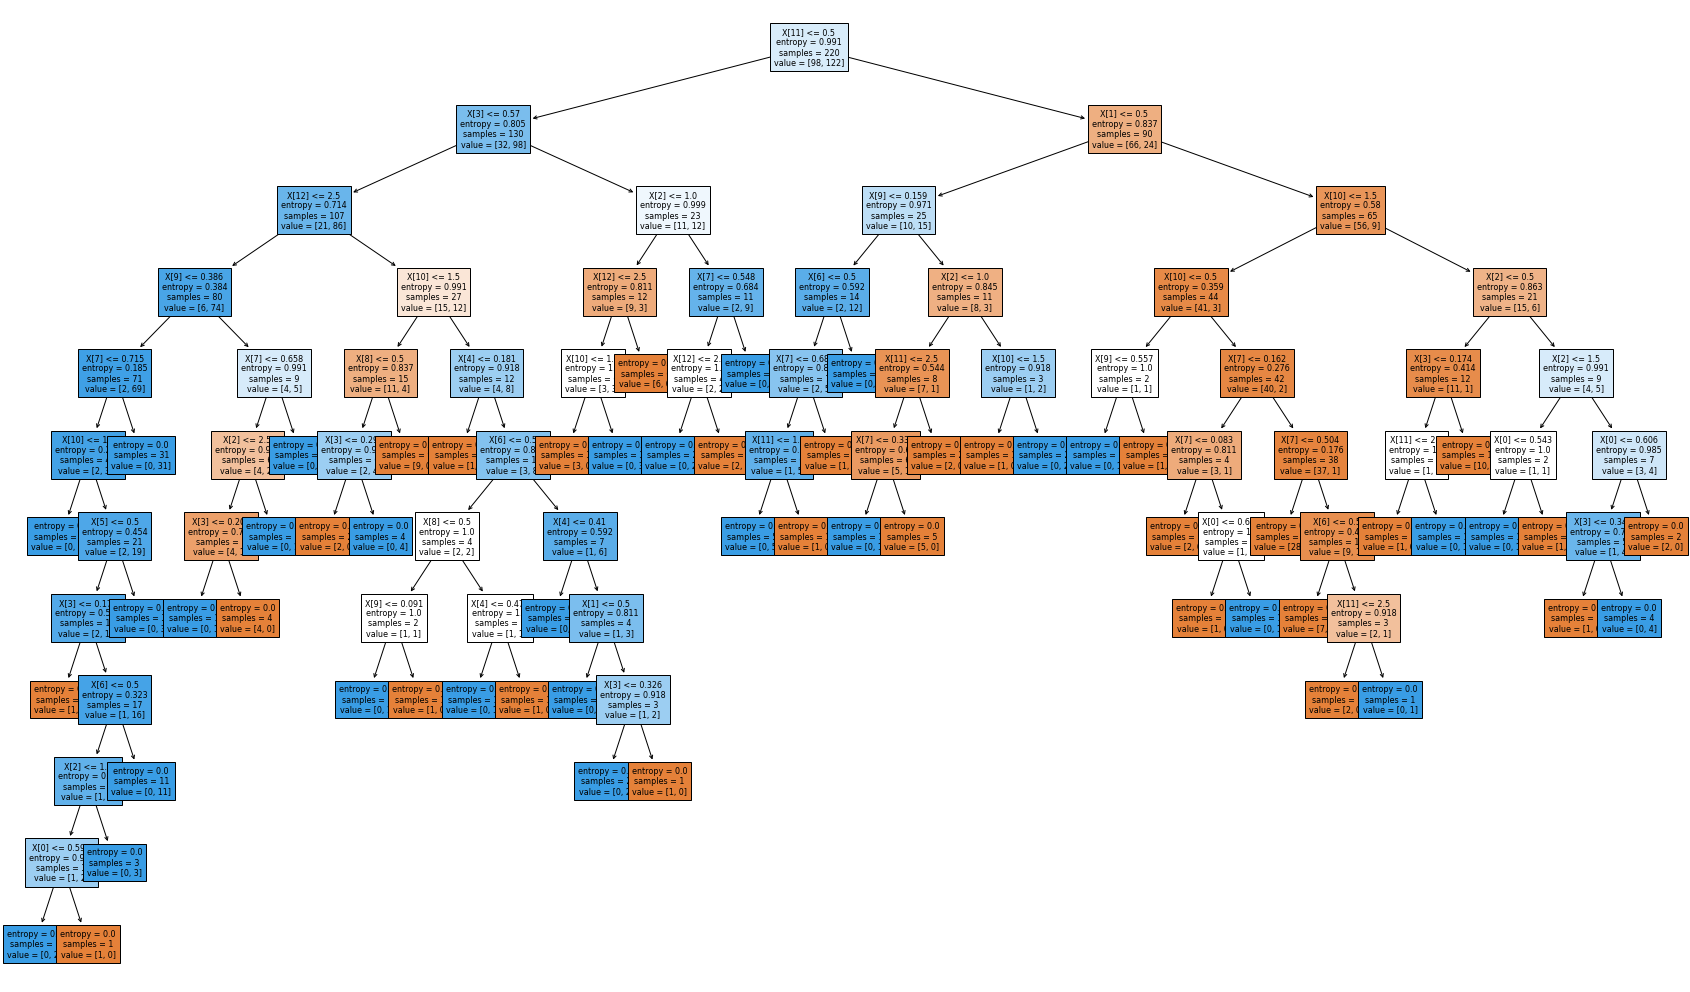

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 18))
plot_tree(grid_dt.best_estimator_, filled=True, fontsize=8)
plt.show()

In [ ]:
y_pred = grid_dt.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.77      0.83      0.80        41

    accuracy                           0.77        74
   macro avg       0.77      0.76      0.77        74
weighted avg       0.77      0.77      0.77        74



###**Random Forest**
A random forest model was constructed by using the random forest classifier from Scikit-Learn library. It is a meta estimator that fits in a number of decision tree classifiers on various sub-samples of the entire dataset. The parameter that we used to tune the model are:

1.   N_estimators:	Number of trees used in the forest.
2.   Criterion:	Function that used to measure the quality of a split
3.   Max features:	The number of features to be considered when looking for best split
4.   Min samples split:	Minimum number of samples required to form a split


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

param_rf = [{"n_estimators": range(10, 310, 10),
             "criterion": ["gini", "entropy"],
             "max_features": ["sqrt", "log2", None],
             "min_samples_split": range(2, 12, 2)}]

grid_rf = GridSearchCV(model_rf, param_rf)

grid_rf.fit(X_train, y_train)             

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)
print(grid_rf.best_estimator_.n_estimators)
print(grid_rf.best_estimator_.criterion)
print(grid_rf.best_estimator_.max_features)
print(grid_rf.best_estimator_.get_params())
print(grid_rf.best_estimator_.n_classes_)
print(grid_rf.best_estimator_.classes_)
print(grid_rf.best_estimator_.n_features_)
print(grid_rf.best_estimator_.n_outputs_)
print(grid_rf.best_estimator_.feature_importances_)
print(len(grid_rf.best_estimator_.estimators_))
print(grid_rf.best_estimator_)
print(grid_rf.best_estimator_.base_estimator_)

pickle.dump(grid_rf.best_estimator_, open(model_path.format("rf"), 'wb'))

In [ ]:
y_pred = grid_rf.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

##**Assess Model**
In order to validate the model constructed, the quality of all 7 models will be tested by using the accuracy of training and testing on the dataset.

As we can see that all of the models have decent accuracy in both training and predicting, which the lowest among them are decision trees which have about 0.74 accuracy on testing dataset. Among them, none of them has a very drastic difference between the training and testing score, the greatest difference is the random forest which is about 0.1 in contrast. This may imply that overfitting problem may not occur in our model.



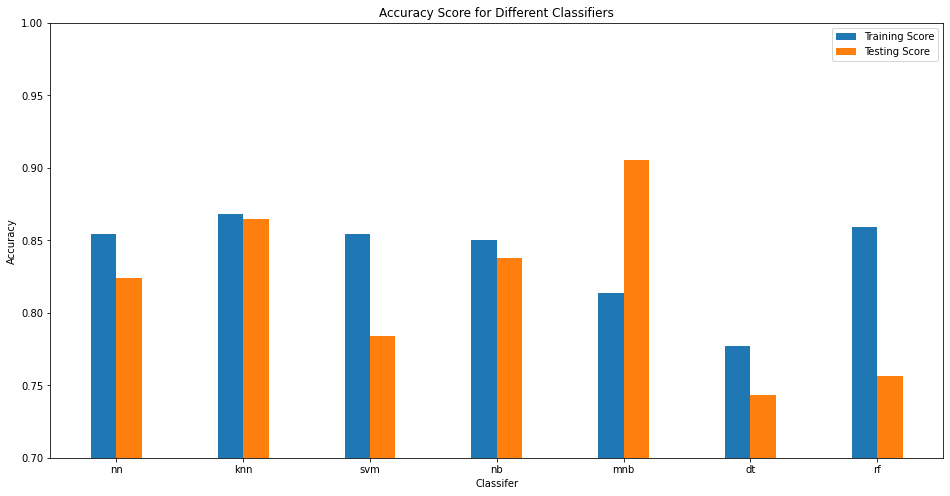

In [ ]:
import pickle
import numpy as np

train_score, test_score = pickle.load(open(model_path.format("all"), 'rb'))

keys = list(train_score.keys()) 
train_values = list(train_score.values()) 
test_values = list(test_score.values()) 
fig = plt.figure(figsize = (16, 8)) 
X = np.arange(7)
plt.bar(X - 0.10, train_values, label="Training Score", width=0.20)
plt.bar(X + 0.10, test_values, label="Testing Score", width=0.20)
plt.ylim(0.70, 1.00)
plt.xlabel("Classifer") 
plt.xticks(ticks=X, labels=keys)
plt.ylabel("Accuracy") 
plt.title("Accuracy Score for Different Classifiers") 
plt.legend()
plt.show()

#**5. Evaluation**

######**Evaluate Results**
After building all the 7 model classifiers mentioned above, we have gone through an evaluation process to evaluate the performance of each model via Accuracy, Precision, Recall, and F1 Score metrics. The 4 metrics are calculated based on the confusion matrix table as shown in Table 5.1 below (Exsilio Solutions, 2016).

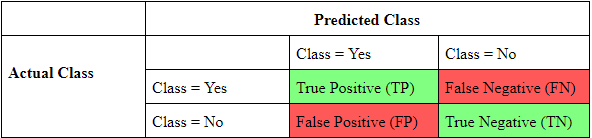

  

#### Getting Individual Model's Result (Demonstration on how to obtain individual model results)
This part is to simply demonstrate the code for getting the individual best parameters model for each algorithm we used for the ease of testing the results.

In [ ]:
# obtaining best nn models
nn_best = pickle.load(open(model_path.format("nn"), 'rb'))
nn_best.fit(X_train, y_train)
y_pred_nn = nn_best.predict(X_test)
report_nn = classification_report(y_test, y_pred_nn)
print(report_nn)

In [ ]:
# obtaining best knn models
knn_best = pickle.load(open(model_path.format("knn"), 'rb'))
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

In [ ]:
# obtaining best svm models
svm_best = pickle.load(open(model_path.format("svm"), 'rb'))
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

In [ ]:
# obtaining best nb models
nb_best = pickle.load(open(model_path.format("nb"), 'rb'))
nb_best.fit(X_train, y_train)
y_pred_nb = nb_best.predict(X_test)
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

In [ ]:
# obtaining best mnb models
mnb_best = pickle.load(open(model_path.format("mnb"), 'rb'))
mnb_best.fit(X_train, y_train)
y_pred_mnb = mnb_best.predict(X_test)
report_mnb = classification_report(y_test, y_pred_mnb)
print(report_mnb)

In [ ]:
# obtaining best dt models
dt_best = pickle.load(open(model_path.format("dt"), 'rb'))
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

In [ ]:
# obtaining best rf models
rf_best = pickle.load(open(model_path.format("rf"), 'rb'))
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

## **Evaluate the models' results**

In [ ]:
models = ['nn', 'knn', 'svm', 'nb', 'mnb', 'dt', 'rf']
reports = []

for model in models:
  best_model = pickle.load(open(model_path.format(model), 'rb'))
  best_model.fit(X_train, y_train)
  y_pred = best_model.predict(X_test)
  reports.append(classification_report(y_test, y_pred, output_dict=True))

# testing on the reports
for model, report in zip(models, reports):
  print(model.upper(), report)

NN {'0': {'precision': 0.7941176470588235, 'recall': 0.8181818181818182, 'f1-score': 0.8059701492537314, 'support': 33}, '1': {'precision': 0.85, 'recall': 0.8292682926829268, 'f1-score': 0.8395061728395061, 'support': 41}, 'accuracy': 0.8243243243243243, 'macro avg': {'precision': 0.8220588235294117, 'recall': 0.8237250554323725, 'f1-score': 0.8227381610466188, 'support': 74}, 'weighted avg': {'precision': 0.8250794912559618, 'recall': 0.8243243243243243, 'f1-score': 0.8245509190782823, 'support': 74}}
KNN {'0': {'precision': 0.896551724137931, 'recall': 0.7878787878787878, 'f1-score': 0.8387096774193549, 'support': 33}, '1': {'precision': 0.8444444444444444, 'recall': 0.926829268292683, 'f1-score': 0.8837209302325582, 'support': 41}, 'accuracy': 0.8648648648648649, 'macro avg': {'precision': 0.8704980842911878, 'recall': 0.8573540280857355, 'f1-score': 0.8612153038259565, 'support': 74}, 'weighted avg': {'precision': 0.8676814745780264, 'recall': 0.8648648648648649, 'f1-score': 0.863

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

report_list = []
for report in reports:
  metric_list = []
  metric_list.append(report['accuracy'])
  metric_list.append(report['weighted avg']['precision'])
  metric_list.append(report['weighted avg']['recall'])
  metric_list.append(report['weighted avg']['f1-score'])
  report_list.append(metric_list)
report_list = np.array(report_list).T
report_list = dict(zip(metrics, report_list))

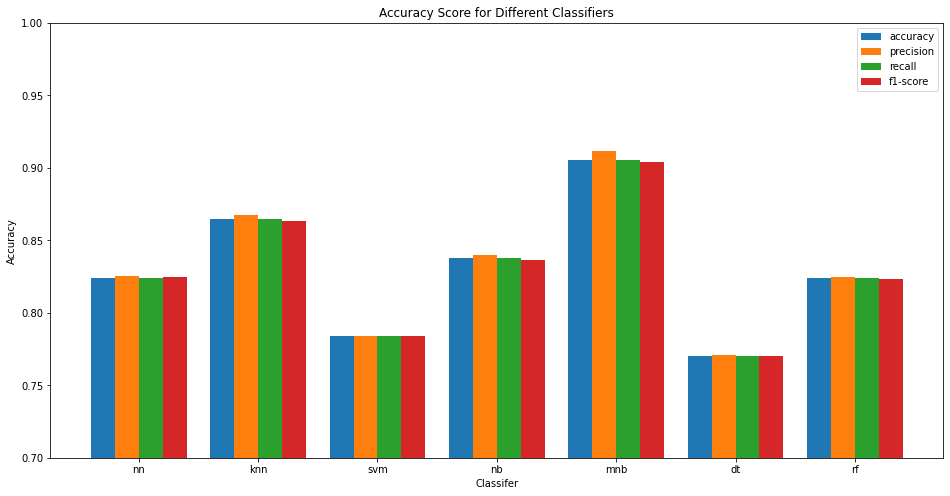

In [ ]:
keys = list(report_list.keys()) 
values = list(report_list.values()) 
#COLORS = 'bgrcmyk'   
fig = plt.figure(figsize = (16, 8)) 
X = np.arange(7)
plt.bar(X - 0.30, values[0], label = metrics[0], width = 0.20)
plt.bar(X - 0.10, values[1], label = metrics[1], width = 0.20)
plt.bar(X + 0.10, values[2], label = metrics[2], width = 0.20)
plt.bar(X + 0.30, values[3], label = metrics[3], width = 0.20)
plt.ylim(0.70, 1.00)
plt.xlabel("Classifer") 
plt.xticks(ticks = X, labels = models)
plt.ylabel("Accuracy") 
plt.title("Accuracy Score for Different Classifiers") 
plt.legend()
plt.show()

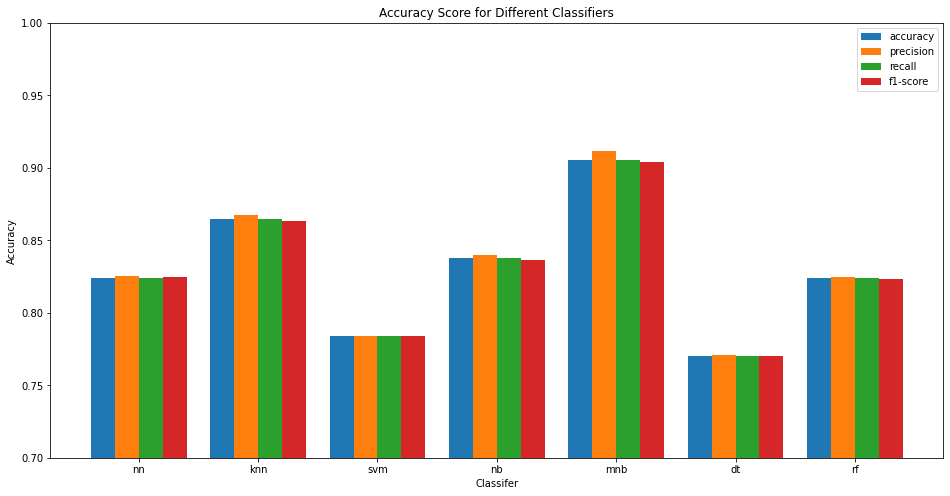
Figure above shows the accuracy score of the 7 classifiers we have obtained. Each classifier’s performance is calculated based on the 4 metrics (accuracy, precision, recall, F1-score). In the figure, we can see that 4 metrics values for each classifier are consistent and not much different with each other. After comparing the accuracy score of each classifier, we can know that the Multinomial Naive Bayes (MNB) classifier achieved the highest accuracy score among the other classifiers. It achieved an excellent accuracy score of more than 0.90.  The classifier with the second highest accuracy score is K-Nearest Neighbour (KNN) which achieved more than 0.85 accuracy score, whereas the other 3 classifiers, which are Neural Network (NN), Gaussian Naive Bayes (NB), and Random Forest (RF) also achieved high accuracy scores of more than 0.80. The classifiers with low accuracy scores of below 0.80 are Support Vector Machine (SVM) and Decision Tree (DT). DT has the lowest accuracy score among the others. 

The one of the reasons which Multinomial Naive Bayes has the best accuracy score is because it only requires a small amount of training data to estimate the parameters necessary for classification and the classifier can be trained incrementally, so it costs lesser time for training and easier to implement compared to other classifiers (Kumar, 2019). Hence, it is more suitable to implement in creating business solutions to the clients as the training data given are usually not big in size in the real-world situation. This classifier is able to overcome this issue as it only needs a small size of data for training. 


## **Review Process**
Although our models were able to meet our business success objectives, however, there are still some improvements that can be done undeniably. One of them is the data cleaning process. In this project, we clean our continuous data through modified z-score to remove any outliers, however, we only did minimum effort in cleaning our nominal and ordinal data by checking the values of the data are in the valid range as specified by the original data collector. However, there are some extreme cases in restecg and thal which one of their class has less than 5 data entries. We may try to combine them with the next class to reduce the dimensionality of the data. 
<br /><br />
One of the procedures that we had implemented to assure the quality of our model is that we used GridSearchCV to help to find the best parameters to tune the model for this dataset. GridSearchCV performs exhaustive search over all the combinations of the specified parameter values for each estimator. It will compare the accuracy results of each different combination of parameters during the training of the model on the same dataset and produce the best parameters to tune the model. Although the best parameters in this dataset may not necessarily perform as good as on other dataset or the actual implementation, however, this practice can be repeated to ensure the model can perform optimally during every condition.


## **Determine Next Steps**
**List of possible actions**
1. Deploy the project
<br />
As in the current phase, the project and the model we have constructed was able to reach our business success objective, which is to predict the probability of the patient having the heart diseases through basic attributes or metrics that can be collected from patient body easily without insertion sampling, such as taking blood sample, or screening scan. Hence, the project is suitable to be deployed.
<br /><br />
2. Further improve the project
<br />
Currently, there is still some ground for improvement available for this project, such as: improving the size of the dataset and further reducing the dimensionality of the data features used. Improvement is not necessary but undoubtedly they are still important, as this project is related to assisting the doctor to help determine the heart disease of the patient. Hence, improvement is one of the possible action to be conducted after the project.
<br /><br />
3. Set up a new project
<br />
As currently, the project was able to fulfill all the business success objectives, hence, the project can be closed and our team can ready for a new project.


# **6. Deployment**
This project will be temporarily developed in Jupyter Notebook and will be deployed to the Google Classroom for the assignment submission. First, the repositories of this project will be created and the access of the file will be shared among all the relevant stakeholders. Next, the dataset used by this project, namely “dataset_heart.csv”, will be required to be stored in the same location as this Jupyter Notebook.

# **7. Conclusion**
To be conclusive, all of our models was able to complete the training and predicting process on this dataset and was able to yield a decent accuracy on predicting the labels of the data. Among them, there are two models, namely Multinomial Naive Bayes and K-Nearest Neighbors was able to predict the testing data with an accuracy score of higher than 0.85 and able to reach 0.96. The high accuracy of our model is definitely one of the strength of our model. Moreover, our model was able to achieve the business success objectives with fast training and predicting time and almost able to yield high accuracy even on small dataset which we used in this project.

However, undeniably, there are still some weakness in our model. For example, our model was not able to perform consistent enough. For example, the accuracy score for neural network and decision tree model will have noticable fluctuation on each iteration during the training. Although after reviewing the accuracy score of each testing and training, overfitting problems do not occured but the inconsistent performance of the models will harm the credibility of the results produced.  